In [1]:
import pandas as pd 
import numpy as np 
#import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import plotly as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
df=pd.read_csv('Cleaned-Data.csv')
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [3]:
df=df.rename(columns={'Gender_Male':'Gender','Contact_No':'Contact','Dry-Cough':'Dry_Cough','Difficulty-in-Breathing':'Difficulty_in_Breathing',
                      'Sore-Throat':'Sore_Throat','None_Symptomps':'Symptomps','Nasal-Congestion':'Nasal_Congestion','Runny-Nose':'Runny_Nose',
                     'Age_0_9':'Age_0_9','Age_10-19':'Age_10_19','Age_20-24':'Age_20_24','Age_25-59':'Age_25_59','Age_60+':'Age_60'})
df=df.drop(columns=['Gender_Female','Contact_Yes','Contact_Dont-Know','Severity_Mild', 'Severity_Moderate', 'Severity_None',
       'Severity_Severe', 'Contact', 'Country'])

In [4]:
!pip install imblearn

In [5]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [6]:
x=df.drop(columns=['None_Sympton'])
y=df['None_Sympton']

In [7]:
x_sm,y_sm=sm.fit_resample(x,y)

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_sm,y_sm,test_size=0.2,random_state=0)

In [9]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [10]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [11]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [12]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest]

In [13]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [14]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest'}

In [15]:
# Fit the pipelines
for pipe in pipelines:
    pipe.fit(xtrain, ytrain)

In [16]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(xtest,ytest)))

Logistic Regression Test Accuracy: 1.0
Decision Tree Test Accuracy: 1.0
RandomForest Test Accuracy: 0.997020202020202


In [17]:
for i,model in enumerate(pipelines):
    if model.score(xtest,ytest)>best_accuracy:
        best_accuracy=model.score(xtest,ytest)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Logistic Regression


In [18]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [19]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [20]:
model = RandomForestClassifier()

In [21]:
rf_RandomGrid = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [22]:
rf_RandomGrid.fit(xtrain, ytrain)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [23]:
rf_RandomGrid.best_params_

{'n_estimators': 48,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [24]:
rf_RandomGrid.best_params_

{'n_estimators': 48,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4,
 'bootstrap': True}

In [26]:
ypred=rf_RandomGrid.predict(xtest)

Accuracy is : 0.995
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     59090
           1       0.99      1.00      1.00     59710

    accuracy                           0.99    118800
   macro avg       1.00      0.99      0.99    118800
weighted avg       1.00      0.99      0.99    118800



<AxesSubplot:>

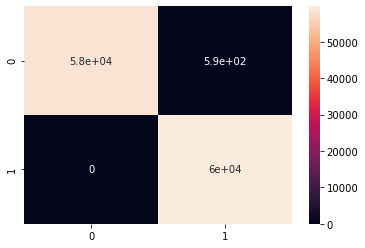

In [27]:
print("Accuracy is :",accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)

In [28]:
import pickle

In [29]:
pickle.dump(rf_RandomGrid,open('pickel_model.pkl','wb'))